## simple single point coronavirus predictions, cnn + rnn
#### using jhu covid data

In [185]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

loading data

In [186]:
datapath = "../../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

# Choose from "US Cases", "US Deaths", "World Cases", "World Deaths", "World Recoveries"
key = "World Cases" 

if key == "US Cases":
    datapath = datapath + "time_series_covid19_confirmed_US.csv"
elif key == "US Deaths":
    datapath = datapath + "time_series_covid19_deaths_US.csv"
elif key == "World Cases":
    datapath = datapath + "time_series_covid19_confirmed_global.csv"
elif key == "World Deaths":
    datapath = datapath + "time_series_covid19_deaths_global.csv"
elif key == "World Recoveries":
    datapath = datapath + "time_series_covid19_recovered_global.csv"

In [187]:
covid_df = pd.read_csv(datapath)

In [188]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140


In [189]:
abridged_covid_df = covid_df.loc[:,'3/22/20':]

In [190]:
abridged_covid_df.index

RangeIndex(start=0, stop=266, step=1)

In [191]:
abridged_covid_df.index = covid_df['Country/Region']

In [192]:
abridged_covid_df

,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,40,40,74,84,94,110,110,120,170,174,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766
Albania,89,104,123,146,174,186,197,212,223,243,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521
Algeria,201,230,264,302,367,409,454,511,584,716,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919
Andorra,113,133,164,188,224,267,308,334,370,376,...,852,852,852,852,852,852,852,853,853,853
Angola,2,3,3,3,4,4,5,7,7,7,...,86,88,91,92,96,113,118,130,138,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,...,499,499,513,513,514,611,632,639,659,661
Yemen,0,0,0,0,0,0,0,0,0,0,...,469,482,484,496,524,560,591,632,705,728
Comoros,0,0,0,0,0,0,0,0,0,0,...,132,141,141,141,141,162,162,163,176,176


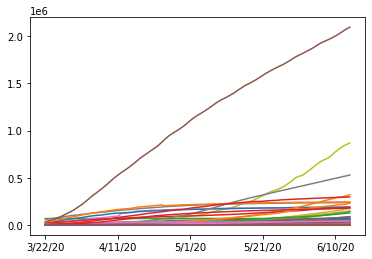

In [193]:
abridged_covid_df.T.plot(legend=False)

In [194]:
abridged_covid_df = abridged_covid_df.sort_values(by=['6/9/20'], ascending=False)
abridged_covid_df = abridged_covid_df.iloc[1:140,:]
abridged_covid_df

,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,...,645771,672846,691758,707412,739503,772416,802828,828810,850514,867624
Russia,367,438,495,658,840,1036,1264,1534,1836,2337,...,449256,458102,467073,476043,484630,493023,501800,510761,519458,528267
United Kingdom,5683,6650,8077,9529,11658,14543,17089,19522,22141,25150,...,283311,284868,286194,287399,289140,290143,291409,292950,294375,295889
India,396,499,536,657,727,887,987,1024,1251,1397,...,236184,246622,257486,265928,276146,286605,297535,297535,308993,320922
Spain,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,...,240978,241310,241550,241717,241966,242280,242707,243209,243605,243928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
China,484,484,484,484,484,484,484,484,484,484,...,947,947,947,947,947,947,947,947,947,947
China,936,936,936,936,936,936,936,937,937,937,...,932,932,932,932,932,932,932,932,932,932
Burkina Faso,75,99,114,146,152,180,207,222,246,261,...,888,888,889,890,891,891,892,892,892,894


In [195]:
abridged_covid_df = abridged_covid_df.sample(frac=1)
flattened_df = abridged_covid_df.to_numpy().flatten()
covid_data = flattened_df
num_regions = abridged_covid_df.shape[0]; print(num_regions)
num_days = abridged_covid_df.shape[1]; print(num_days)

139
85


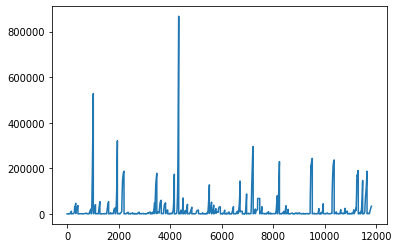

In [196]:
plt.plot(covid_data)
plt.show()

In [197]:
train_end_index = int(len(covid_data) * 0.8) ; train_end_index # about 70 percent for training

9452

In [198]:
# this code is directly from https://www.tensorflow.org/tutorials/structured_data/time_series

def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
    
  return np.array(data), np.array(labels)

In [199]:
# time to scale these features and standardize using training data

"""
train_data_mean = covid_data[:train_end_index].mean()
train_data_std = covid_data[:train_end_index].std()
print(train_data_mean, train_data_std)
covid_data = (covid_data - train_data_mean)/train_data_std
"""

covid_data = covid_data + 0.0

In [200]:
# choose {covid_past_history} vals to use to predict {covid_future_target + 1} vals into the future
covid_past_history = 20
covid_future_target = 0

x_train_covid, y_train_covid = univariate_data(covid_data, 0, train_end_index, covid_past_history, covid_future_target)

x_val_covid, y_val_covid = univariate_data(covid_data, train_end_index, None, covid_past_history, covid_future_target)

In [201]:
print(x_train_covid.shape, y_train_covid.shape)
print(x_train_covid.shape[-2:])

(9432, 20, 1) (9432,)
(20, 1)


In [202]:
print(x_val_covid.shape, y_val_covid.shape)

(2343, 20, 1) (2343,)


### Need to clean this training data up for it to work with this covid data, removing the bogus sequences

In [203]:
def clean_data_covid(x_data, y_data, num_days, history):
    index = num_days - history
    index_range = np.array([])
    
    while index < len(x_data):
        index_range = np.append(index_range, np.arange(index, index + history))
        index = index + history + num_days
    
    print(list(index_range))
    #x_data = np.delete(x_data, index_range.astype(int), 0)
    #y_data = np.delete(y_data, index_range.astype(int), 0)
    
    return x_data, y_data

In [204]:
x_train_covid, y_train_covid = clean_data_covid(x_train_covid, y_train_covid, 
                                                num_days, covid_past_history)

[65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 380.0, 381.0, 382.0, 383.0, 384.0, 385.0, 386.0, 387.0, 388.0, 389.0, 390.0, 391.0, 392.0, 393.0, 394.0, 395.0, 396.0, 397.0, 398.0, 399.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 590.0, 591.0, 592.0, 593.0, 594.0, 595.0, 596.0, 597.0, 598.0, 599.0, 600.0, 601.0, 602.0, 603.0, 604.0, 605.0, 606.0, 607.0, 608.0, 609.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0, 701.0, 702.0, 703.0, 704.0, 705.0, 706.0, 707.0, 708.0, 709.0, 710.0, 711.0, 712.0, 713.0, 714.0, 800.0, 801.0, 802.0, 803.0, 804.0, 805.

Past history example:
 [[1.1964e+04]
 [2.0000e+00]
 [3.0000e+00]
 [3.0000e+00]
 [7.0000e+00]
 [1.0000e+01]
 [1.0000e+01]
 [1.0000e+01]
 [1.8000e+01]
 [2.7000e+01]
 [2.7000e+01]
 [7.4000e+01]
 [9.8000e+01]
 [1.2000e+02]
 [1.4400e+02]
 [1.8400e+02]
 [2.5300e+02]
 [2.7800e+02]
 [3.4200e+02]
 [4.1000e+02]]
using this history to predict the val:  438.0


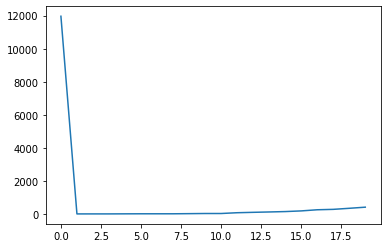

In [219]:
index = 
print("Past history example:\n", x_train_covid[index])
print("using this history to predict the val: ", y_train_covid[index])
plt.plot(x_train_covid[index])

In [46]:
# much of below code is derived from https://www.tensorflow.org/tutorials/structured_data/time_series

BATCH_SIZE = num_days

train_covid = tf.data.Dataset.from_tensor_slices((x_train_covid, y_train_covid))
train_covid = train_covid.cache().batch(BATCH_SIZE).repeat()

val_covid = tf.data.Dataset.from_tensor_slices((x_val_covid, y_val_covid))
val_covid = val_covid.batch(BATCH_SIZE).repeat()

In [47]:
# creating the neural network model

lstm_prediction_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=x_train_covid.shape[-2:]),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

In [48]:
lstm_prediction_model.compile(optimizer='adam', loss='mae')

In [49]:
lstm_prediction_model.fit(train_covid, epochs=10, steps_per_epoch=150, validation_data=val_covid, validation_steps=50)

Train for 150 steps, validate for 50 steps
Epoch 1/10
150/150 [==============================] - 14s 91ms/step - loss: 0.1044 - val_loss: 0.0831
Epoch 2/10
150/150 [==============================] - 11s 71ms/step - loss: 0.0659 - val_loss: 0.0696
Epoch 3/10
150/150 [==============================] - 11s 72ms/step - loss: 0.0445 - val_loss: 0.0482
Epoch 4/10
150/150 [==============================] - 11s 72ms/step - loss: 0.0459 - val_loss: 0.0509
Epoch 5/10
150/150 [==============================] - 11s 73ms/step - loss: 0.0503 - val_loss: 0.1080
Epoch 6/10
150/150 [==============================] - 11s 74ms/step - loss: 0.0494 - val_loss: 0.0395
Epoch 7/10
150/150 [==============================] - 11s 75ms/step - loss: 0.0468 - val_loss: 0.0557
Epoch 8/10
150/150 [==============================] - 11s 75ms/step - loss: 0.0453 - val_loss: 0.1123
Epoch 9/10
150/150 [==============================] - 11s 75ms/step - loss: 0.0416 - val_loss: 0.0369
Epoch 10/10
150/150 [==================

In [50]:
def create_time_steps(length):
  return list(range(-length, 0))

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

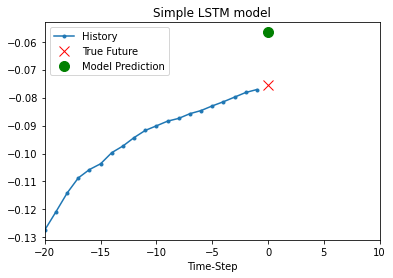

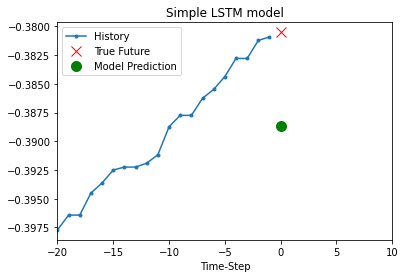

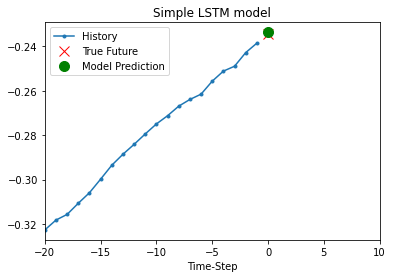

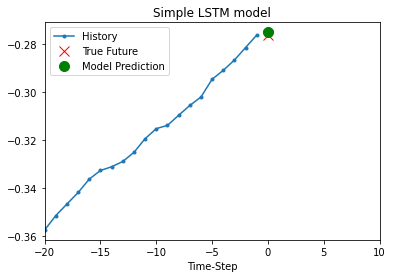

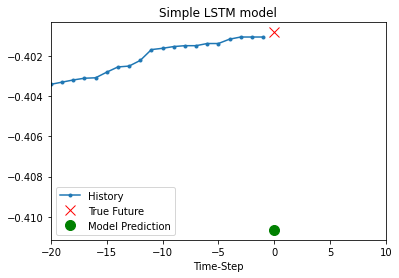

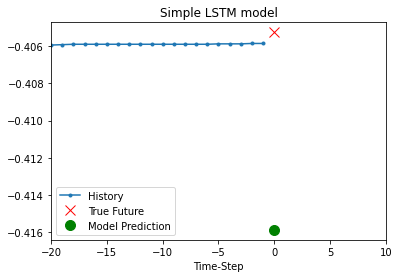

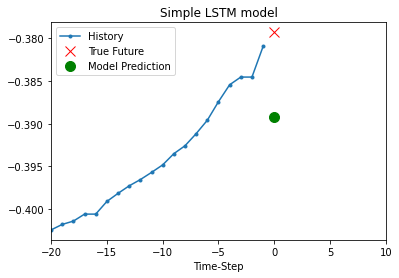

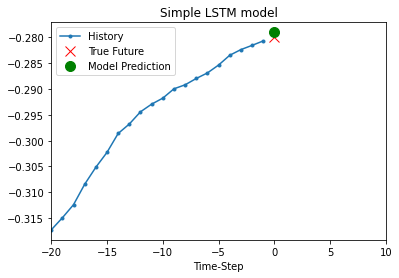

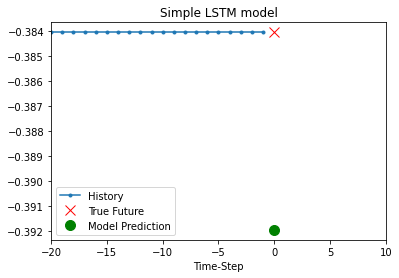

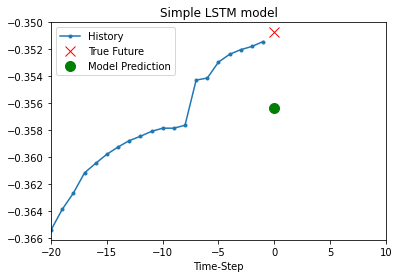

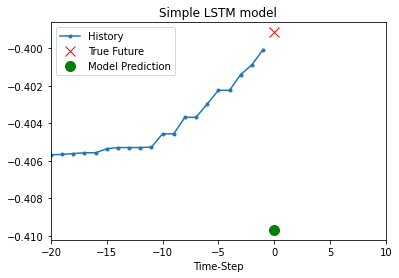

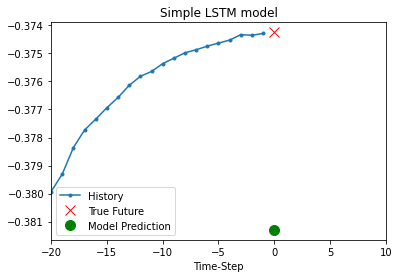

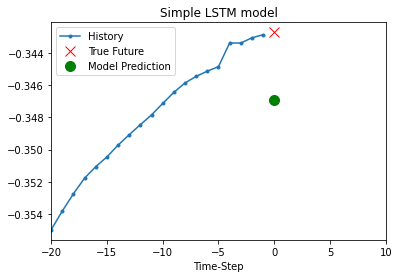

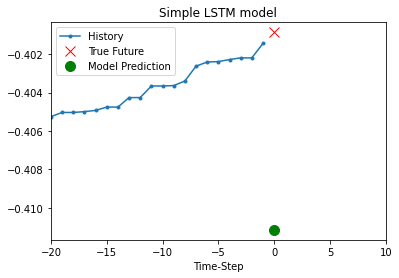

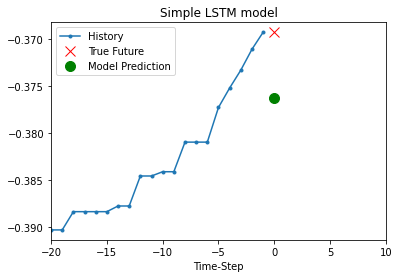

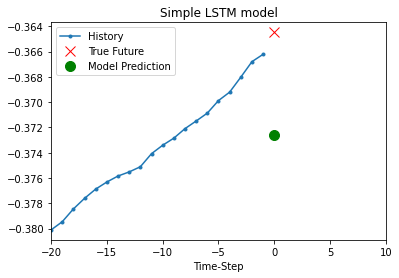

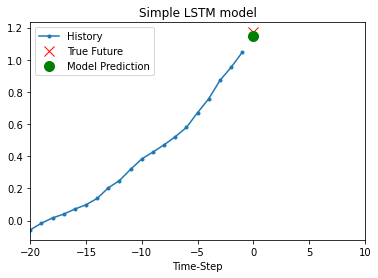

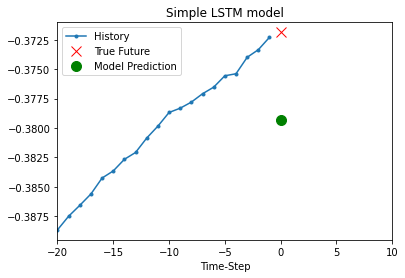

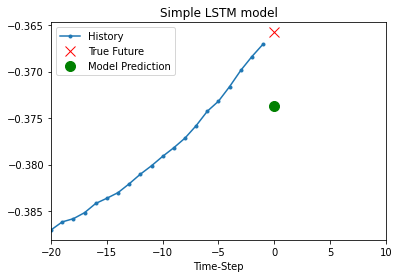

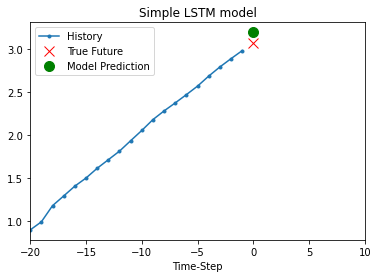

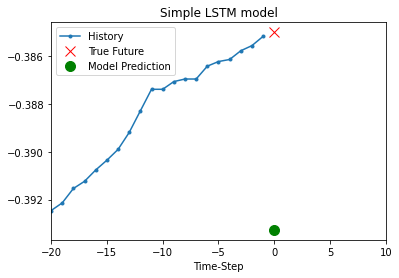

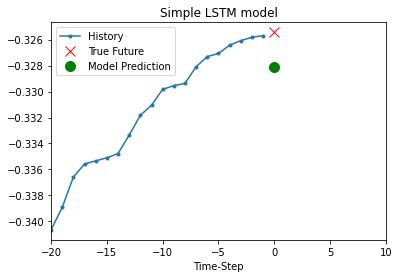

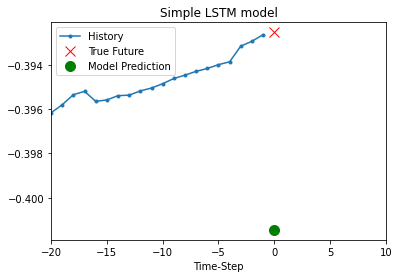

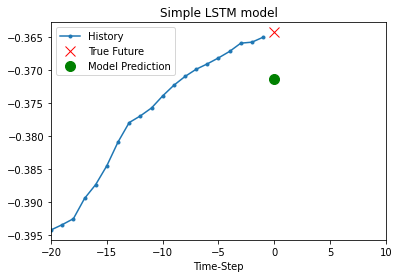

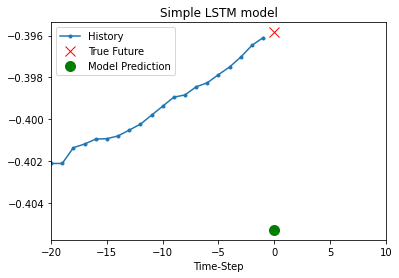

In [51]:
for x, y in val_covid.take(25):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    lstm_prediction_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()